In [3]:
import polars as pl

In [6]:
def get_df(url):
    return pl.read_parquet(source=url)

In [4]:
def get_eleicao_18():
    return get_df(f"https://raw.githubusercontent.com/perferctstorm/DiscursoOdioEleicoes/main/Dados/Eleicoes/eleicao18_turno_01.parquet")

In [25]:
def get_municipios():
    return get_df(f"https://raw.githubusercontent.com/perferctstorm/DiscursoOdioEleicoes/main/Dados/Eleicoes/municipios.parquet") 

In [26]:
df_municipios = get_municipios()

In [29]:
df_municipios.limit(1)

codigo_tse,codigo_ibge,nome,uf,capital,latitude,longitude,ddd
i64,i64,str,str,i64,f64,f64,i64
93360,5200050,"""Abadia de Goiás""","""GO""",0,-16.7573,-49.4412,62


In [7]:
df_poll_18:pl.DataFrame = get_eleicao_18()
df_poll_18 = df_poll_18.filter(pl.col("CD_CARGO")==1)
df_poll_18 = df_poll_18.drop("NR_ZONA")
df_poll_18.limit(1)

ANO_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,QT_VOTOS_VALIDOS,SIGLA_2022,POSIC_IDEOLOGICO,SG_POSIC_IDEOLOGICO,SG_REGIAO,NM_REGIAO
i64,str,str,str,str,i64,str,i64,str,i64,str,str,i64,str,str,str,str,str
2018,"""F""","""SP""","""BR""","""BRASIL""",61948,"""ITAPIRAPUÃ PAULISTA""",1,"""Presidente""",45,"""PSDB""","""Partido da Social Democracia B…",394,"""PSDB""","""Centro Direita""","""CD""","""SE""","""Sudeste"""


In [8]:
cols_list:list[str] = df_poll_18.columns
cols_list.remove("QT_VOTOS_VALIDOS")

In [9]:
df_poll_18 = df_poll_18.group_by(cols_list).sum()

In [11]:
df_poll_18 = df_poll_18.with_columns(
    pl.col("QT_VOTOS_VALIDOS").sum().over("CD_MUNICIPIO").alias("TOTAL_VOTOS_MUNIC"),
    (pl.col("QT_VOTOS_VALIDOS")/ pl.col("QT_VOTOS_VALIDOS").sum().over("CD_MUNICIPIO")).alias("PCT_VOTOS_MUNIC"),
)

In [12]:
df_poll_18

ANO_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SIGLA_2022,POSIC_IDEOLOGICO,SG_POSIC_IDEOLOGICO,SG_REGIAO,NM_REGIAO,QT_VOTOS_VALIDOS,TOTAL_VOTOS_MUNIC,PCT_VOTOS_MUNIC
i64,str,str,str,str,i64,str,i64,str,i64,str,str,str,str,str,str,str,i64,i64,f64
2018,"""F""","""MS""","""BR""","""BRASIL""",91413,"""RIBAS DO RIO PARDO""",1,"""Presidente""",50,"""PSOL""","""Partido Socialismo e Liberdade""","""PSOL""","""Extrema Esquerda""","""EE""","""CO""","""Centro-Oeste""",81,9332,0.00868
2018,"""F""","""MA""","""BR""","""BRASIL""",7358,"""BENEDITO LEITE""",1,"""Presidente""",13,"""PT""","""Partido dos Trabalhadores""","""PT""","""Centro Esquerda""","""CE""","""NE""","""Nordeste""",2203,2952,0.746274
2018,"""F""","""TO""","""BR""","""BRASIL""",96652,"""WANDERLÂNDIA""",1,"""Presidente""",19,"""PODE""","""Podemos""","""PODE""","""Direita""","""D""","""N""","""Norte""",13,4728,0.00275
2018,"""F""","""MG""","""BR""","""BRASIL""",41521,"""SANTO ANTÔNIO DO RETIRO""",1,"""Presidente""",18,"""REDE""","""Rede Sustentabilidade""","""REDE""","""Centro""","""C""","""SE""","""Sudeste""",12,3743,0.003206
2018,"""F""","""RS""","""BR""","""BRASIL""",85626,"""IVORÁ""",1,"""Presidente""",30,"""NOVO""","""Partido Novo""","""NOVO""","""Direita""","""D""","""S""","""Sul""",23,1464,0.01571
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2018,"""F""","""RS""","""BR""","""BRASIL""",84956,"""SILVEIRA MARTINS""",1,"""Presidente""",16,"""PSTU""","""Partido Socialista dos Trabalh…","""PSTU""","""Extrema Esquerda""","""EE""","""S""","""Sul""",1,1775,0.000563
2018,"""F""","""PI""","""BR""","""BRASIL""",12661,"""SÃO MIGUEL DA BAIXA GRANDE""",1,"""Presidente""",12,"""PDT""","""Partido Democrático Trabalhist…","""PDT""","""Centro Esquerda""","""CE""","""NE""","""Nordeste""",177,1714,0.103267
2018,"""F""","""ZZ""","""BR""","""BRASIL""",29904,"""LA PAZ""",1,"""Presidente""",27,"""DC""","""Democracia Cristã""","""DC""","""Direita""","""D""","""ZZ""","""Exterior""",1,235,0.004255


In [16]:
df_poll_18.filter( (pl.col("NM_MUNICIPIO")=="FORTALEZA") & (pl.col("SG_UF")=="CE")).limit(1)

ANO_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,CD_CARGO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SIGLA_2022,POSIC_IDEOLOGICO,SG_POSIC_IDEOLOGICO,SG_REGIAO,NM_REGIAO,QT_VOTOS_VALIDOS,TOTAL_VOTOS_MUNIC,PCT_VOTOS_MUNIC
i64,str,str,str,str,i64,str,i64,str,i64,str,str,str,str,str,str,str,i64,i64,f64
2018,"""F""","""CE""","""BR""","""BRASIL""",13897,"""FORTALEZA""",1,"""Presidente""",18,"""REDE""","""Rede Sustentabilidade""","""REDE""","""Centro""","""C""","""NE""","""Nordeste""",9187,1361788,0.006746


In [42]:
breaks = [.25, .4, .55]
domain=["<=25%", ">25%,<=40%", ">40%,<=55%",">55%"]

df_choropleth = df_poll_18.select(["CD_MUNICIPIO","TOTAL_VOTOS_MUNIC","QT_VOTOS_VALIDOS","PCT_VOTOS_MUNIC"])
df_choropleth = (
    df_choropleth
    .with_columns(
        pl.col("PCT_VOTOS_MUNIC").cut(breaks, labels=domain).alias("PCT_VOTOS_LIMIT")
    )
)
df_choropleth = (
    df_choropleth
    .join(df_municipios, left_on="CD_MUNICIPIO", right_on="codigo_tse", how="inner")
    .drop(pl.col(["capital","ddd"])) 
)

df_choropleth

CD_MUNICIPIO,TOTAL_VOTOS_MUNIC,QT_VOTOS_VALIDOS,PCT_VOTOS_MUNIC,PCT_VOTOS_LIMIT,codigo_ibge,nome,uf,latitude,longitude
i64,i64,i64,f64,cat,i64,str,str,f64,f64
91413,9332,81,0.00868,"""<=25%""",5007109,"""Ribas do Rio Pardo""","""MS""",-20.4445,-53.7588
7358,2952,2203,0.746274,""">55%""",2101806,"""Benedito Leite""","""MA""",-7.21037,-44.5577
96652,4728,13,0.00275,"""<=25%""",1722081,"""Wanderlândia""","""TO""",-6.85274,-47.9601
41521,3743,12,0.003206,"""<=25%""",3160454,"""Santo Antônio do Retiro""","""MG""",-15.3393,-42.6171
85626,1464,23,0.01571,"""<=25%""",4310751,"""Ivorá""","""RS""",-29.5232,-53.5842
…,…,…,…,…,…,…,…,…,…
47317,3610,24,0.006648,"""<=25%""",3136603,"""Nova União""","""MG""",-19.6876,-43.583
84956,1775,1,0.000563,"""<=25%""",4320651,"""Silveira Martins""","""RS""",-29.6467,-53.591
12661,1714,177,0.103267,"""<=25%""",2210383,"""São Miguel da Baixa Grande""","""PI""",-5.85646,-42.1934


In [22]:
from urllib.request import urlopen
import json
import plotly.express as px

with urlopen('https://raw.githubusercontent.com/perferctstorm/DiscursoOdioEleicoes/refs/heads/main/Dados/Eleicoes/geojs-100-mun_minifier.json') as response:
    municipios = json.load(response)

In [43]:
fig = px.choropleth(df_choropleth, geojson=municipios, locations='codigo_ibge', color='PCT_VOTOS_LIMIT',
                           color_continuous_scale="Viridis",
                           range_color=(0, 4),
                           #scope="usa",
                           labels={'uf':'UF'}
                          )

ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] but received: codigo_ibge

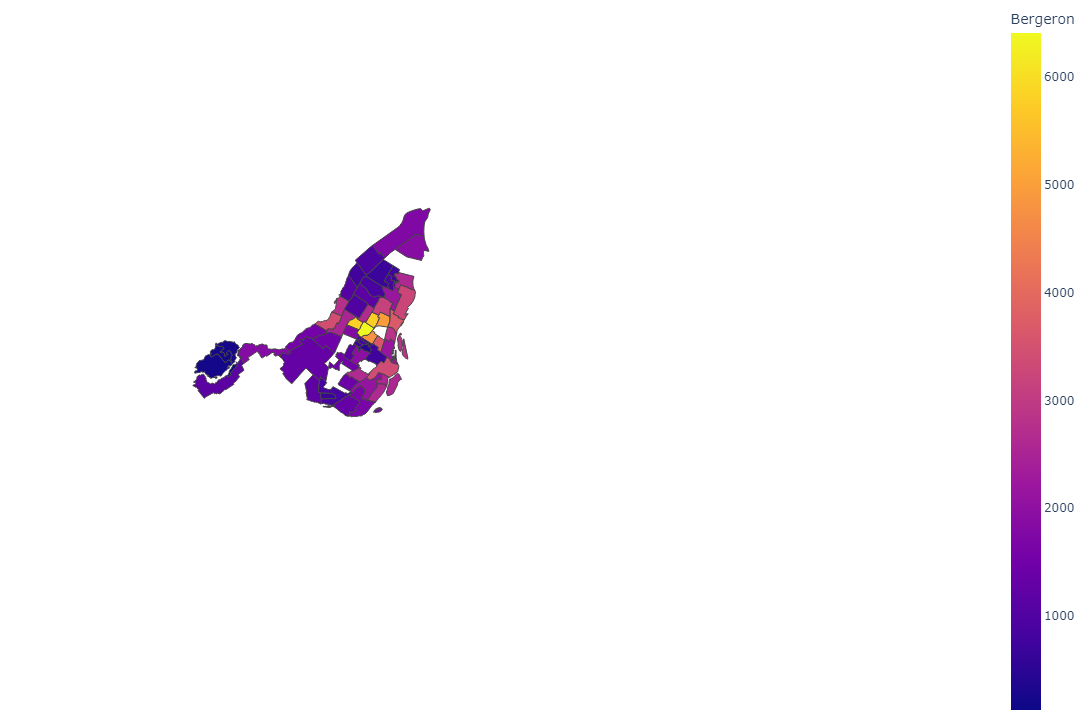

In [57]:
import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(df, geojson=geojson, color="Bergeron",
                    locations="district", featureidkey="properties.district",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [59]:
#


Index(['district', 'Coderre', 'Bergeron', 'Joly', 'total', 'winner', 'result',
       'district_id'],
      dtype='object')

In [51]:
df[:1]

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101


In [52]:
municipios["features"][0]["properties"]

{'id': '1100015',
 'name': "Alta Floresta D'Oeste",
 'description': "Alta Floresta D'Oeste",
 'uf_municipio': 'Rondônia - Alta Floresta D oeste'}

In [71]:
geojson["features"][0]

{'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-73.6363215300962, 45.5759177646435],
     [-73.6362833815582, 45.5758266113331],
     [-73.6446417578686, 45.5658132919643],
     [-73.6453511352974, 45.5647725775888],
     [-73.648867564748, 45.5586898267402],
     [-73.6513170845065, 45.5545659435652],
     [-73.6515658357324, 45.5554439857955],
     [-73.6660837831645, 45.5596724837829],
     [-73.6706609041685, 45.5610978251999],
     [-73.6676019919116, 45.5632340862888],
     [-73.6645385824068, 45.5642716484367],
     [-73.663663123697, 45.5654269638586],
     [-73.663336397858, 45.5666288247853],
     [-73.6637764768649, 45.5678900619231],
     [-73.6625073244826, 45.5688479494114],
     [-73.6624620526633, 45.5708304456346],
     [-73.6620201425015, 45.5713925326191],
     [-73.6616100197742, 45.5737924780218],
     [-73.6612199500215, 45.5747171555678],
     [-73.6625087613399, 45.5748980132699],
     [-73.6639172423219, 45.5730041908097],
     [

In [63]:
df_choropleth = df_choropleth.to_pandas()

In [62]:
#import plotly.express as px
#fig = px.choropleth(df_choropleth.to_pandas(), geojson=municipios, color="PCT_VOTOS_LIMIT",
#                    locations="codigo_ibge", featureidkey="properties.id",
#                    projection="mercator"
#                   )
#fig.update_geos(fitbounds="locations", observed=False)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()


In [65]:
df_choropleth[:1]

,CD_MUNICIPIO,TOTAL_VOTOS_MUNIC,QT_VOTOS_VALIDOS,PCT_VOTOS_MUNIC,PCT_VOTOS_LIMIT,codigo_ibge,nome,uf,latitude,longitude
0,91413,9332,81,0.00868,<=25%,5007109,Ribas do Rio Pardo,MS,-20.4445,-53.7588
